# THE HUMAN FREEDOM INDEX

## Introduction

#### Import relevant packages

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data

Source: https://www.kaggle.com/gsutters/the-human-freedom-index/version/2#_=_

In [2]:
hf_df = pd.read_csv('../data/human_freedom.csv')

In [128]:
hf_mean_df = pd.read_csv('../data/human_freedom_mean_score.csv')

### Viewing the data

In [129]:
hf_df.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.241402,57.0,2.0


In [130]:
hf_mean_df.head()

,ISO_code,countries,region,hf_score
0,AGO,Angola,Sub-Saharan Africa,5.499577
1,ALB,Albania,Eastern Europe,7.522911
2,ARE,United Arab Emirates,Middle East & North Africa,6.441008
3,ARG,Argentina,Latin America & the Caribbean,6.677056
4,ARM,Armenia,Caucasus & Central Asia,7.413269


##### Data types of the variables

In [4]:
hf_df.dtypes

year             int64
ISO_code        object
countries       object
region          object
hf_score       float64
hf_rank        float64
hf_quartile    float64
dtype: object

In [131]:
hf_mean_df.dtypes

ISO_code      object
countries     object
region        object
hf_score     float64
dtype: object

##### Summary statistics

In [5]:
hf_df.describe()

,year,hf_score,hf_rank,hf_quartile
count,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.111756,6.993444,77.007983,2.490566
std,2.569130,1.025811,44.506549,1.119698
min,2008.000000,3.765827,1.000000,1.000000
25%,2010.000000,6.336685,39.000000,1.000000
50%,2012.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.894660,115.000000,3.000000
max,2016.000000,9.126313,162.000000,4.000000


In [132]:
hf_mean_df.describe()

,hf_score
count,162.000000
mean,6.935735
std,1.040268
min,4.258014
25%,6.319065
50%,6.836717
75%,7.853451
max,8.970342


### Removing country data that is not complete for all years

##### Getting list of country names that don't have data for all the years

In [27]:
countries_year_count = hf_df.groupby(['countries']).size().reset_index().rename(columns={0:'count'})
country_missing_data = list(countries_year_count.loc[countries_year_count['count'] != 9]['countries'])
country_missing_data

['Belarus',
 'Bhutan',
 'Brunei Darussalam',
 'Cambodia',
 'Cape Verde',
 'Gambia, The',
 'Guinea',
 'Iraq',
 'Laos',
 'Lebanon',
 'Liberia',
 'Libya',
 'Qatar',
 'Saudi Arabia',
 'Seychelles',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Tajikistan',
 'Timor-Leste',
 'Yemen, Rep.']

##### Getting country data that have data for all the years

In [29]:
hf_country_years_complete = hf_df[~hf_df['countries'].isin(country_missing_data)]

##### Double-checking that countries have data for all 9 years

In [31]:
hf_country_years_complete['countries'].value_counts()

Spain                     9
Tunisia                   9
Latvia                    9
Estonia                   9
Venezuela                 9
Malaysia                  9
Azerbaijan                9
Burundi                   9
Lithuania                 9
Netherlands               9
Turkey                    9
Sierra Leone              9
Austria                   9
Cameroon                  9
Zimbabwe                  9
Botswana                  9
Belize                    9
Ireland                   9
Hungary                   9
Zambia                    9
Barbados                  9
Honduras                  9
Sweden                    9
Nigeria                   9
Philippines               9
Egypt                     9
El Salvador               9
Ethiopia                  9
Belgium                   9
Sri Lanka                 9
Denmark                   9
Guatemala                 9
Luxembourg                9
Bahamas                   9
Indonesia                 9
New Zealand         

### Has the world freedom changed over the years? 
- World freedom for a particular year is calculated by taking the mean of the country hf scores for that year
- Only countries that have data for all the years are included

In [33]:
hf_country_years_complete.groupby(['year']).mean()['hf_score']

year
2008    7.069785
2009    7.075678
2010    7.075024
2011    7.076528
2012    7.030769
2013    7.053720
2014    7.041126
2015    7.017344
2016    7.010904
Name: hf_score, dtype: float64

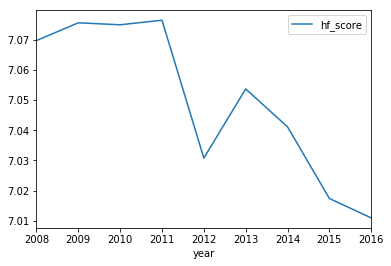

In [34]:
hf_country_years_complete.groupby(['year']).mean().plot.line(y='hf_score', use_index=True)

##### What's the difference between the freedom in 2008 and 2016?

In [35]:
7.010904 - 7.069785

-0.058881000000000405

### What are the countries with the most freedom? <br> Have they changed over the years?

In [40]:
for i in range(2008, 2017):
    print('\033[1m' + str(i) + '\033[0m')
    print(hf_df.loc[hf_df['year'] == i].sort_values(by=['hf_rank']).head(10))

2008
      year ISO_code       countries          region  hf_score  hf_rank  hf_quartile
1293  2008      HKG       Hong Kong       East Asia  9.126313      1.0          1.0
1332  2008      NZL     New Zealand         Oceania  8.910542      2.0          1.0
1359  2008      CHE     Switzerland  Western Europe  8.774437      3.0          1.0
1242  2008      AUS       Australia         Oceania  8.686020      4.0          1.0
1273  2008      DNK         Denmark  Western Europe  8.687174      4.0          1.0
1260  2008      CAN          Canada   North America  8.653002      6.0          1.0
1281  2008      FIN         Finland  Western Europe  8.653871      6.0          1.0
1336  2008      NOR          Norway  Western Europe  8.592142      8.0          1.0
1371  2008      GBR  United Kingdom  Western Europe  8.536421      9.0          1.0
1299  2008      IRL         Ireland  Western Europe  8.464583     10.0          1.0
2009
      year ISO_code       countries          region  hf_score  hf_

TypeError: 'DataFrame' object is not callable

In [45]:
hf_df.loc[hf_df['hf_rank'] < 11]['countries'].unique()

array(['Australia', 'Canada', 'Denmark', 'Finland', 'Hong Kong',
       'Ireland', 'Netherlands', 'New Zealand', 'Norway', 'Switzerland',
       'Taiwan', 'United Kingdom', 'Austria', 'Luxembourg', 'Germany',
       'Sweden'], dtype=object)

### What are the countries with the least freedom? <br> Have they changed over the years?

In [51]:
for i in range(2008, 2017):
    print('\033[1m' + str(i) + '\033[0m')
    print(hf_df.loc[hf_df['year'] == i].sort_values(by=['hf_rank']).tail(10))

2008
      year ISO_code       countries                         region  hf_score  hf_rank  hf_quartile
1360  2008      SYR           Syria     Middle East & North Africa  5.457516    132.0          4.0
1338  2008      PAK        Pakistan                     South Asia  5.401850    133.0          4.0
1279  2008      ETH        Ethiopia             Sub-Saharan Africa  5.358855    134.0          4.0
1266  2008      COD  Congo, Dem. R.             Sub-Saharan Africa  5.351843    135.0          4.0
1374  2008      VEN       Venezuela  Latin America & the Caribbean  5.257879    136.0          4.0
1262  2008      TCD            Chad             Sub-Saharan Africa  5.212512    137.0          4.0
1238  2008      DZA         Algeria     Middle East & North Africa  5.153065    138.0          4.0
1328  2008      MMR         Myanmar                     South Asia  4.955303    139.0          4.0
1377  2008      ZWE        Zimbabwe             Sub-Saharan Africa  4.935571    140.0          4.0
1239 

### What is the distribution of the HF score for countries?
- The hf score for a country is calculated by taking the mean of the score over the years

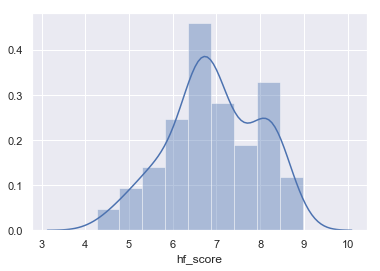

In [133]:
sns.distplot(hf_mean_df['hf_score'])

- HF follows a bimodal distribution

### Is this distribution different for different years?

Text(0, 0.5, 'Density')

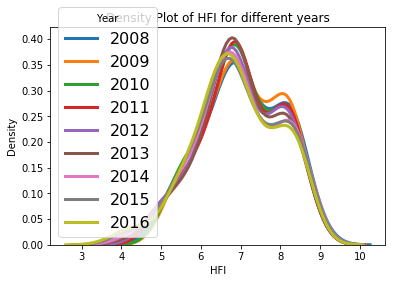

In [54]:
for year in range(2008,2017):
    # Subset of year
    subset = hf_df[hf_df['year'] == year]
    
    # Draw the density plot
    sns.distplot(subset['hf_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = year)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Year')
plt.title('Density Plot of HFI for different years')
plt.xlabel('HFI')
plt.ylabel('Density')

- There is no significant difference in the distribution for different years

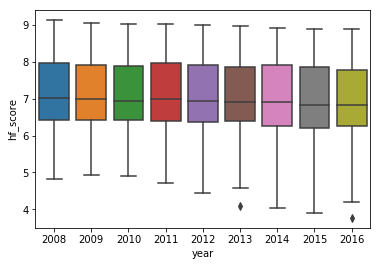

In [60]:
sns.boxplot(x="year", y="hf_score", data=hf_df)

- Year 2013 and 2016 have outliers, each of these years has one country (Syria) that has a much lower HFI score than the overall distribution pattern for that year 
- The later years (2012, 2016) have longer lower whiskers than upper whiskers. This indicates that the HFI scores vary more for the least positive quartile group than the most positive quartile group. This is most noticed in 2014, 2015.
- The upper half of the box plot for all the years is bigger than the lower half. This indicates that the countries with more freedom vary more than the countries with less freedom.
- The min HFI score has decreased over the years

### What is the minimum HFI score over the years?

In [61]:
hf_df.groupby(['year'], sort=False)['hf_score'].min()

year
2016    3.765827
2015    3.910826
2014    4.023595
2013    4.095028
2012    4.441783
2011    4.710594
2010    4.909415
2009    4.927673
2008    4.823528
Name: hf_score, dtype: float64

##### What is the freedom difference between the least free country in 2008 and the least free country in 2016

In [62]:
3.765827 - 4.823528

-1.0577009999999998

### What is the maximum HFI score over the years?

In [64]:
hf_df.groupby(['year'], sort=False)['hf_score'].max()

year
2016    8.887410
2015    8.876890
2014    8.921386
2013    8.971815
2012    8.999086
2011    9.027891
2010    9.028448
2009    9.052653
2008    9.126313
Name: hf_score, dtype: float64

##### What is the freedom difference between the most free country in 2008 and the most free country in 2016

In [65]:
8.887410 - 9.126313

-0.23890300000000053

### Has freedom changed over the years for countries? 

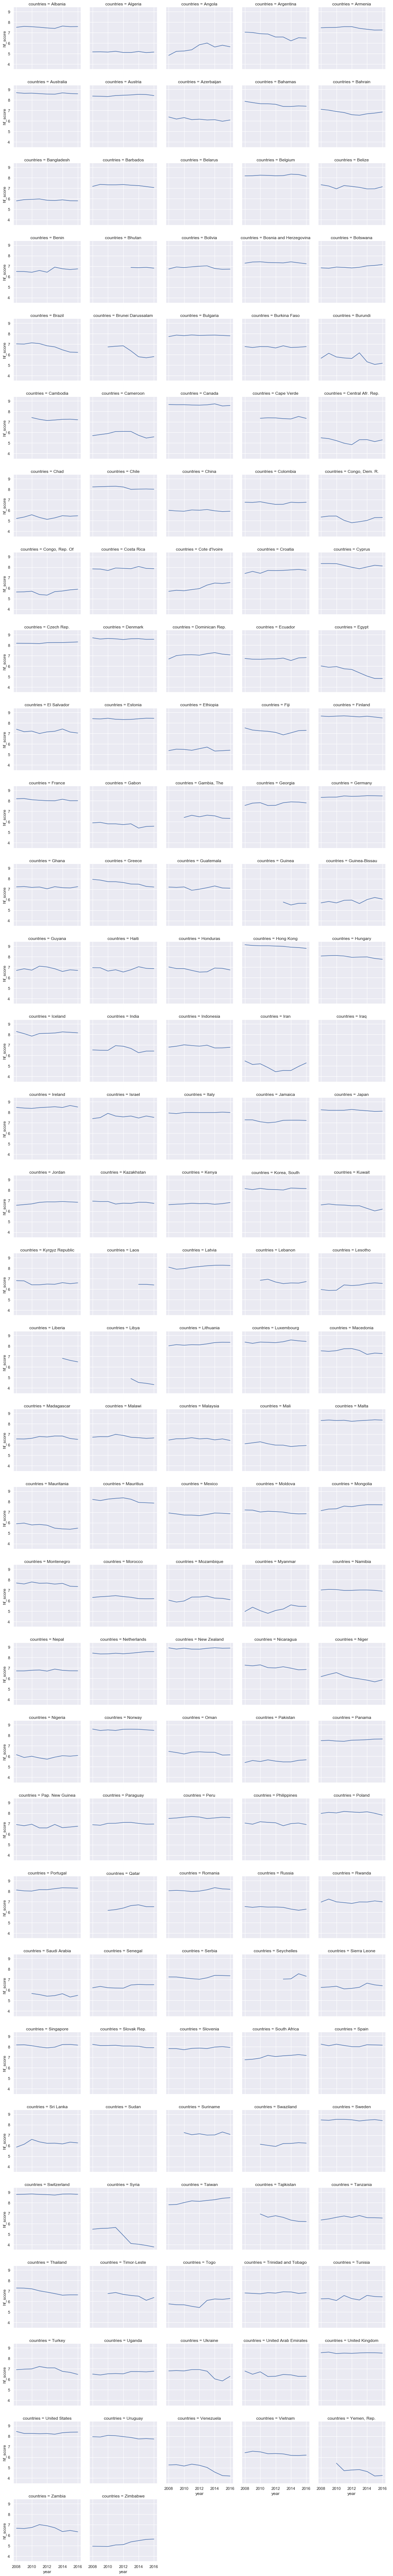

In [134]:
g = sns.FacetGrid(hf_df, col="countries", col_wrap=5)
g = (g.map(sns.lineplot,'year','hf_score').add_legend())

### Do different regions have different levels of freedom? <br> Have there been any interesting changes over time?

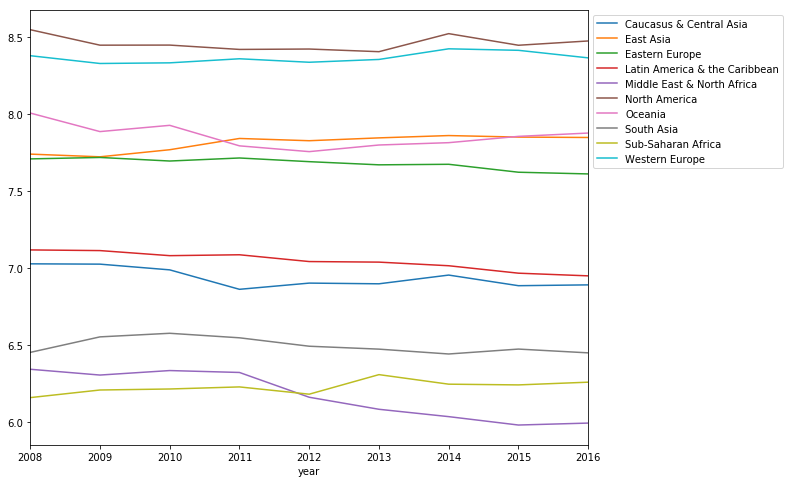

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
for index, group in hf_country_years_complete.groupby(['region']):
    group_agg = group.groupby(['year']).aggregate(np.mean)
    group_agg.plot(y='hf_score', label=index, ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

- 'North America' has consistently been the most free region
- 'Western Europe' has much more freedom than Eastern Europe
- 2012 onwards 'Middle East & North Africa' has less freedom than 'Sub-Saharan Africa'

### What is the freedom distribution by region? <br> Do different regions have different distributions?
- Uses mean_score for countries

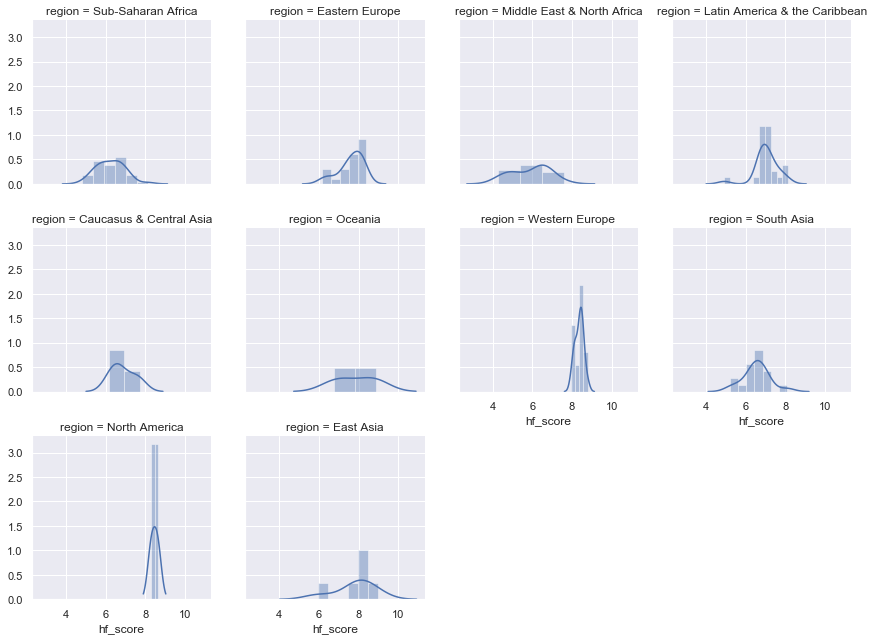

In [135]:
g = sns.FacetGrid(hf_mean_df, col="region", col_wrap=4)
g = (g.map(sns.distplot,'hf_score').add_legend())

### Did the freedom distribution by region change in the given timeframe?

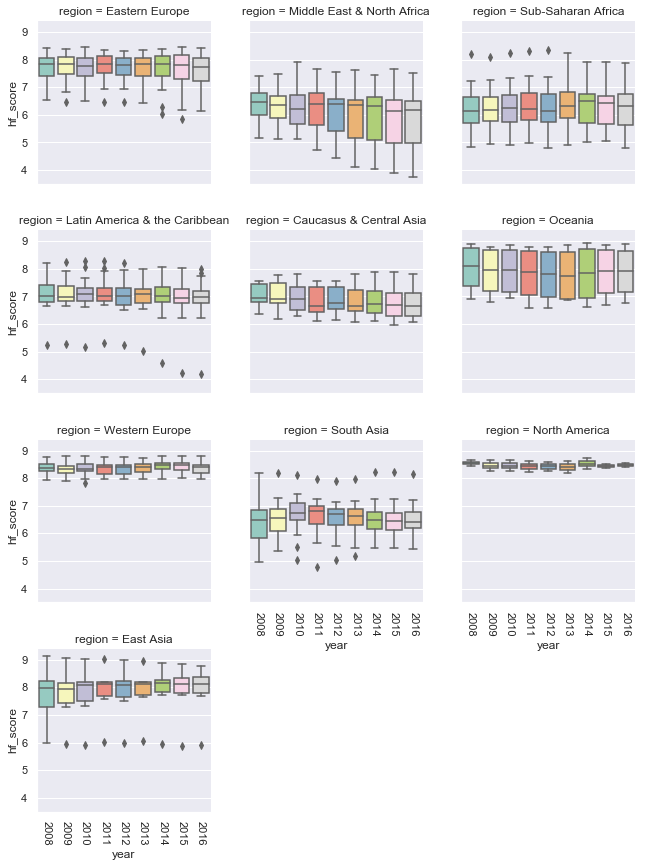

In [93]:
g = sns.FacetGrid(hf_df, col="region", col_wrap=3)
g = (g.map(sns.boxplot,'year','hf_score',palette="Set3").add_legend())

# source: https://stackoverflow.com/questions/43727278/how-to-set-readable-xticks-in-seaborns-facetgrid
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=-90) # set new labels
plt.show()

- In Western Europe and North America, the countries do not vary much in freedom
- The countries in Oceania and Middle East & North Africa do vary in freedom
- The mean freedom of Eastern Europe has'nt changed much over the years
- The mean freedom of Caucasus & Central Asia and South Asia has changed over the years

### Outlier countries by region
##### Eastern Europe
- Negative Outlier: Russia (Ukraine (2014, 2015))

##### Sub-Saharan Africa
- Positive Outlier: Mauritius

##### Latin America & the Caribbean
- Positive Outlier: Chile, Uruguay (Costa Rica (2016))
- Negative Outlier: Venezuela

##### Western Europe
- Negative Outlier: Iceland

##### South Asia
- Positive Outlier: Singapore
- Negative Outlier: Myanmar, Pakistan

##### East Asia
- Positive Outlier: Hong Kong
- Negative Outlier: China

### HFI distibution per region by country

Eastern Europe


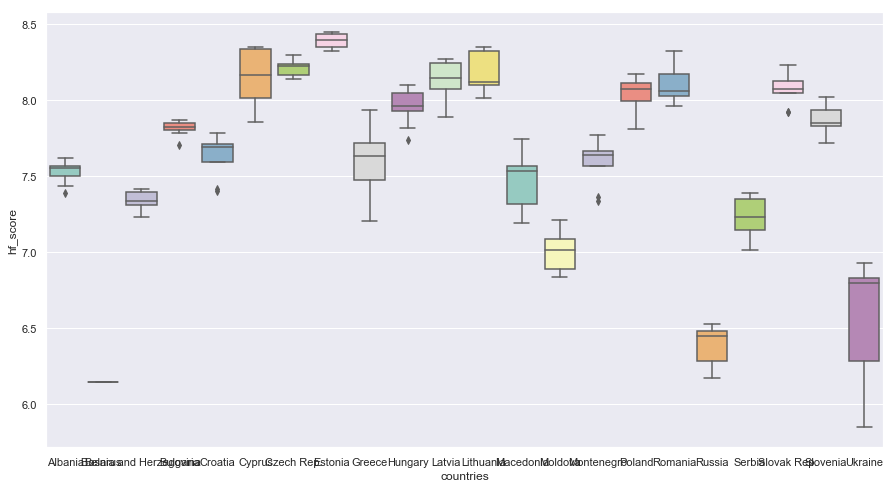

Middle East & North Africa


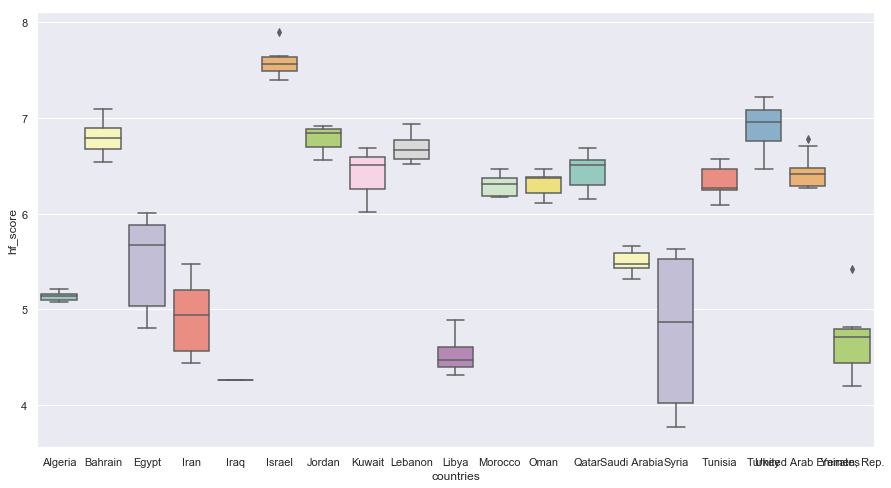

Sub-Saharan Africa


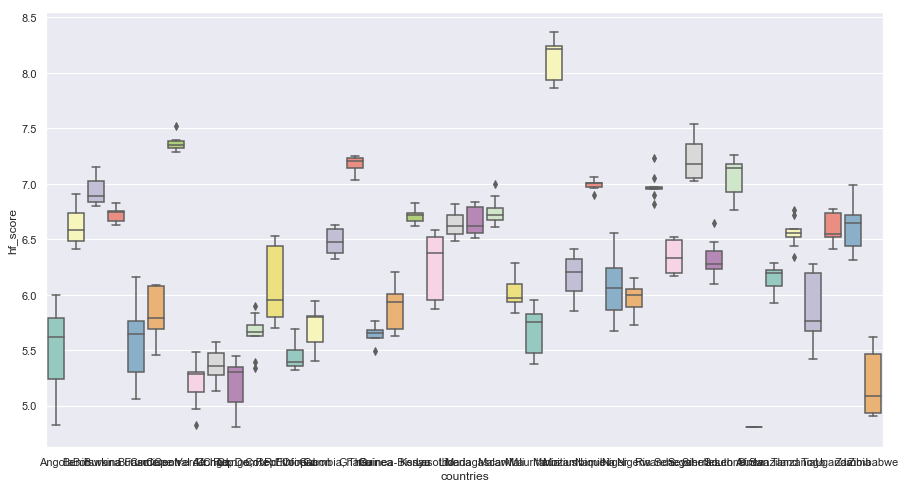

Latin America & the Caribbean


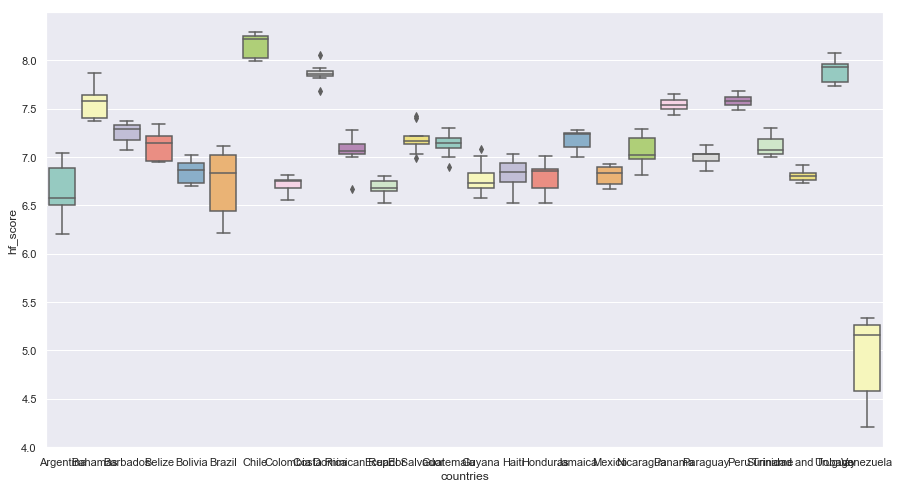

Caucasus & Central Asia


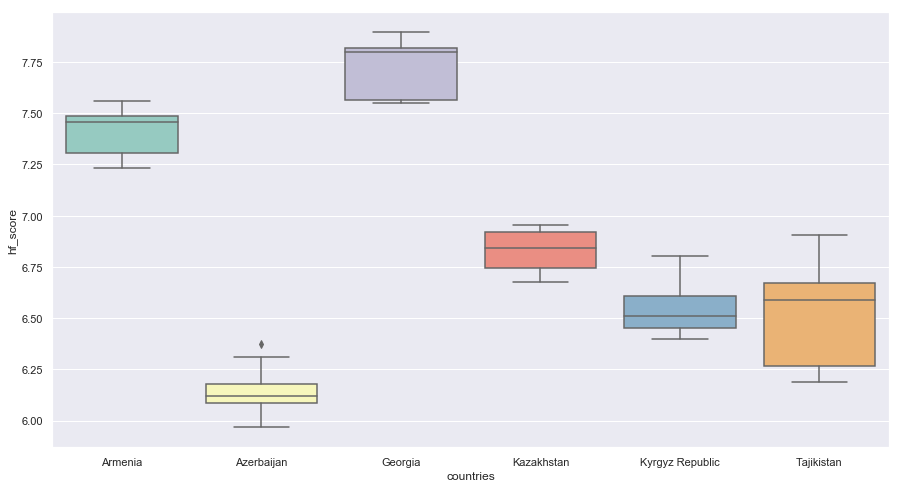

Oceania


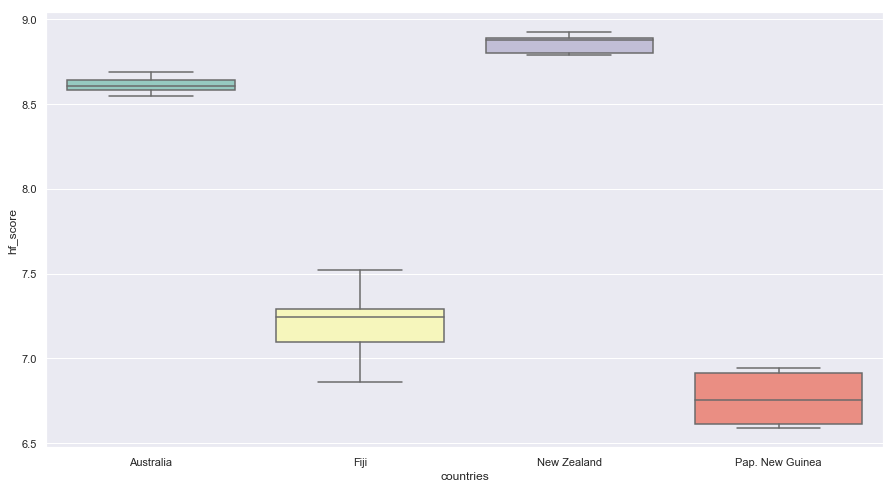

Western Europe


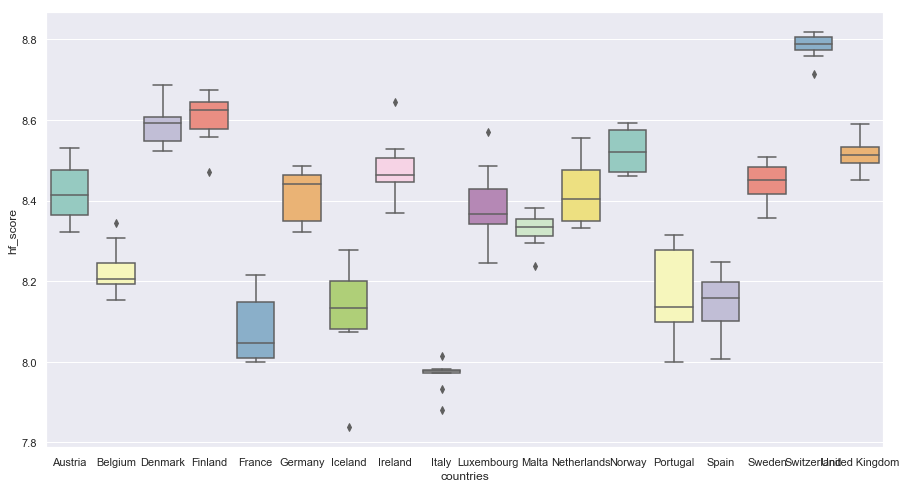

South Asia


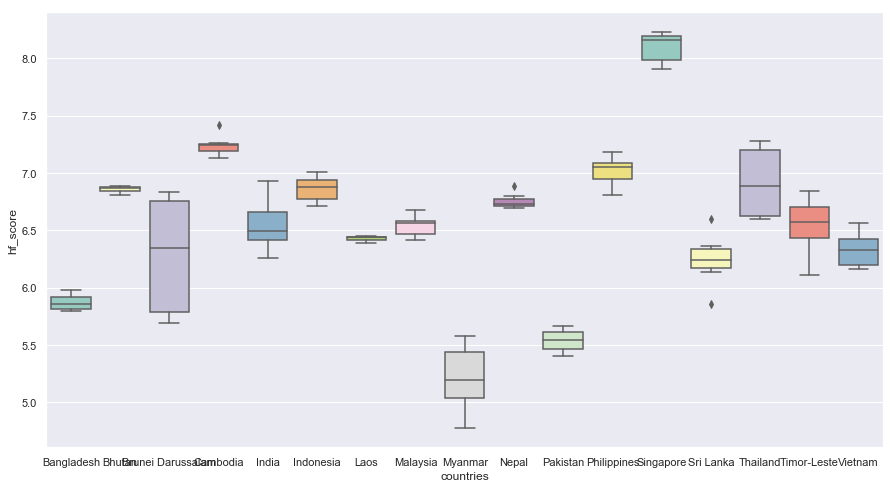

North America


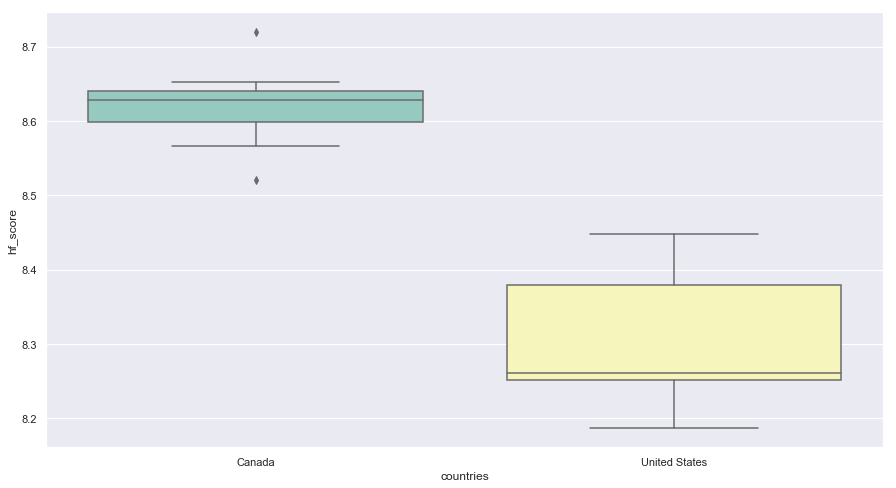

East Asia


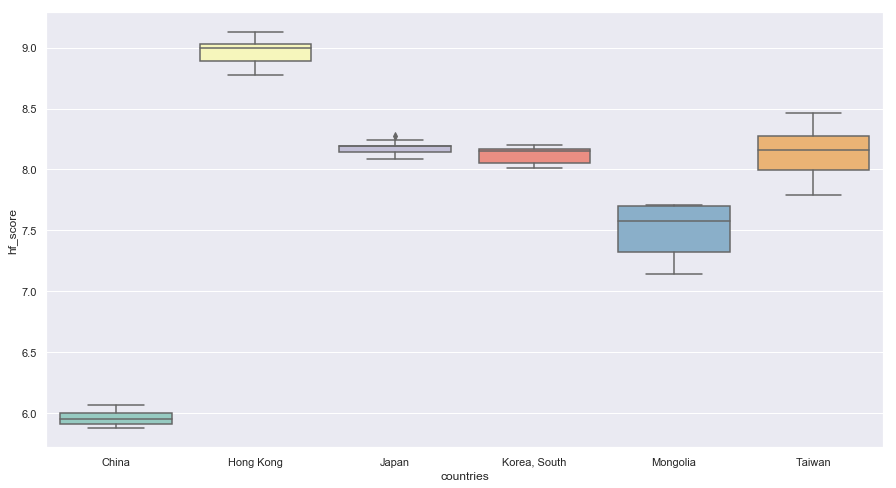

In [99]:
i = 0
sns.set(rc={'figure.figsize':(15,8)})
for region in hf_df['region'].unique():
    plt.figure(i)
    print(region)
    sns.boxplot(x="countries", y="hf_score", data=hf_df[hf_df['region'] == region], palette="Set3")
    i+=1
    plt.show()

### HFI distribution of the top 15 influential countries

In [100]:
most_influential_countries_iso = [
    'USA', 'RUS','CHN','GBR','DEU',
    'FRA','JPN','ISR','SAU','ARE',
    'CAN','KOR','IRN','TUR','IND']

most_influential_countries = hf_df[hf_df['ISO_code'].isin(most_influential_countries_iso)]

In [101]:
most_influential_countries['countries'].unique()

array(['Canada', 'China', 'France', 'Germany', 'India', 'Iran', 'Israel',
       'Japan', 'Korea, South', 'Russia', 'Saudi Arabia', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

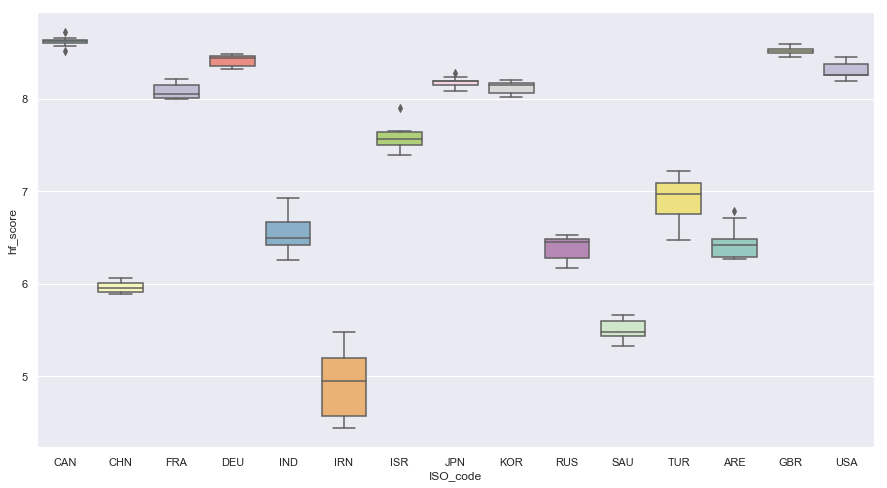

In [102]:
sns.boxplot(x="ISO_code", y="hf_score", data=most_influential_countries, palette="Set3")

## Colonies
https://ourworldindata.org/colonialism